In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten 
import cv2
import pickle
import os

In [7]:
# Load data
def load_Scale_data():
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    # Preprocess the data
    x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
    x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
    return x_train, y_train, x_test, y_test


# Visualize images
def showImages(num_images, x, y):
    for i in range(num_images):
        print(y[i])
        plt.figure(figsize=(7, 7))
        plt.imshow(x[i])
        plt.show()


# Resize grayscale images to RGB and preprocess for VGG16
def preprocess_images(images):
    processed_images = []
    for image in images:
        # Convert grayscale to RGB
        rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        # Resize to 48x48
        resized = cv2.resize(rgb, (48, 48))
        processed_images.append(resized)
    return preprocess_input(np.array(processed_images)) 


# Feature extraction
def extract_features(X_train , X_test):
    # Feature extraction using VGG16
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))  # Updated input_shape
    x = base_model.output
    x = Flatten()(x)
    feature_model = Model(inputs=base_model.input, outputs=x)
    X_train_features = feature_model.predict(X_train)
    X_test_features = feature_model.predict(X_test)
    return X_train_features, X_test_features


In [8]:
def show_image(x, when):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        # Reshape the feature vector back into the original image shape
        img = x[i].reshape(28, 28)
        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(f'MNIST Images {when} Preprocessing')
    plt.show()

def draw_hist(x,when):
    plt.figure(figsize=(8, 5))
    plt.hist(x.flatten(), bins=50, color='b', alpha=0.7, label= when + 'Preprocessing')
    plt.title(f'Histogram of Pixel Intensity Values ({when} Preprocessing)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [10]:
x_train, y_train, x_test1, y_test = load_Scale_data()
x_test1.shape

(10000, 28, 28, 1)

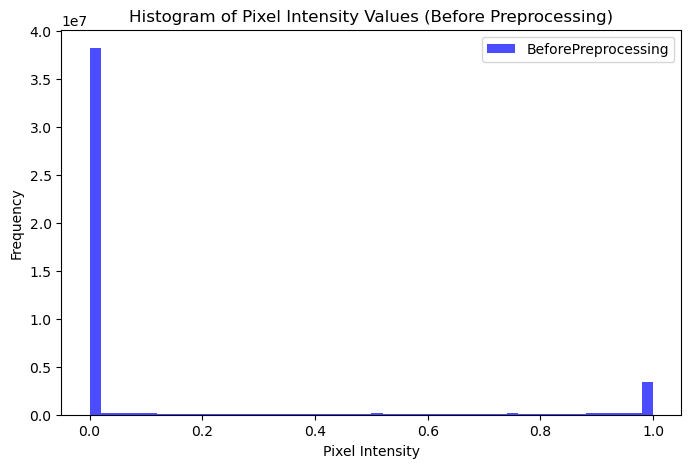

In [11]:
draw_hist(x_train,'Before')

In [12]:
x_train_images_resized_rgb = preprocess_images(x_train)
x_test_images_resized_rgb = preprocess_images(x_test1)

In [13]:
x_train_features, x_test_features = extract_features(x_train_images_resized_rgb, x_test_images_resized_rgb)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 68ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step


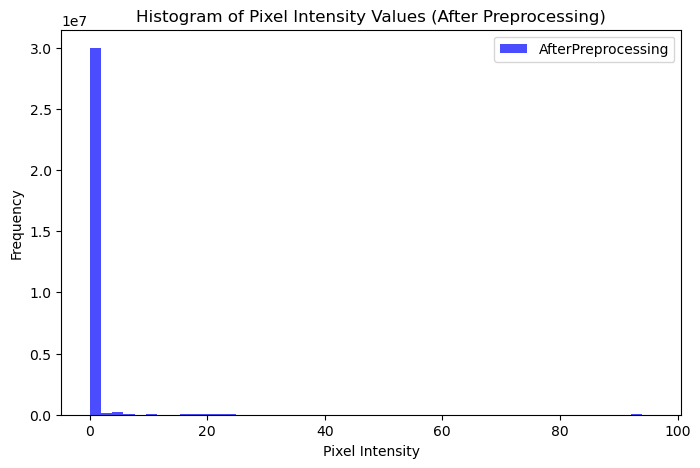

In [14]:
draw_hist(x_train_features,'After')

In [236]:
np.save('x_train_feature.npy',x_train_features)
np.save('x_test_feature.npy',x_test_features)

with open('y_train.pkl','wb') as path:
    pickle.dump(y_train,path)
with open('y_test.pkl','wb') as path:
    pickle.dump(y_test,path)  

In [237]:
print("Train Features Shape:",x_train_features.shape)
print("Test Features Shape:", x_test_features.shape)

Train Features Shape: (60000, 512)
Test Features Shape: (10000, 512)


In [238]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


In [239]:
x_train=np.load('x_train_feature.npy')
x_test=np.load('x_test_feature.npy')
with open('y_train.pkl','rb') as path:
    Y_train=pickle.load(path)
with open('y_test.pkl','rb') as path:
    Y_test=pickle.load(path)
    
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)    
    
print(x_test.shape)
print(y_test.shape)
print(y_test[1])
print(Y_test[1])

(10000, 512)
(10000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


In [240]:
# Reshape the labels
y_train_re = np.argmax(y_train, axis=1)
y_test_re = np.argmax(y_test, axis=1)

In [241]:
def draw (y_predict, model_name, y_test_copy = y_test_re ):
    cm_nb = confusion_matrix(y_test_copy, y_predict)

# Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print classification report
    print(f"Classification Report - {model_name}:")
    print(classification_report(y_test_copy, y_predict))

Epoch 1/3


C:\Users\Abo Hasan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2068 - loss: 2.2651
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5962 - loss: 1.1374
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6698 - loss: 0.9619
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.6899 - loss: 0.8695
Test loss: 0.7906509041786194
Test accuracy: 0.7213000059127808
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
Predicted classes: [7 0 1 0 4 1 6 6 5 9 0 6 9 0 1 3 9 7 0 4]
True classes:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


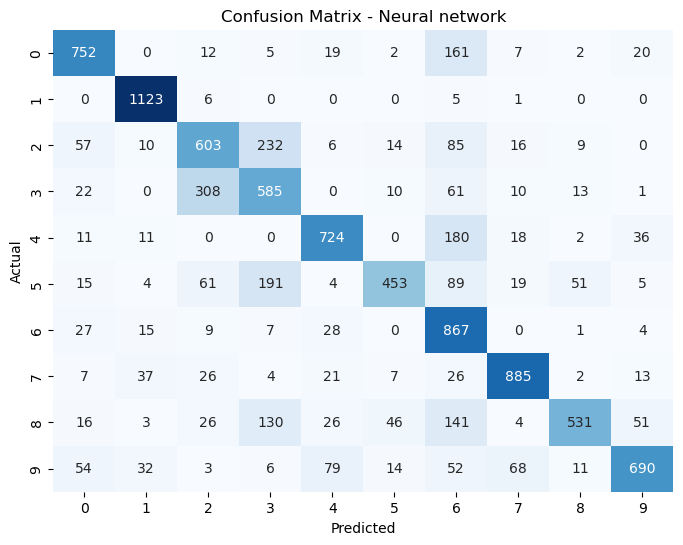

Classification Report - Neural network:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       980
           1       0.91      0.99      0.95      1135
           2       0.57      0.58      0.58      1032
           3       0.50      0.58      0.54      1010
           4       0.80      0.74      0.77       982
           5       0.83      0.51      0.63       892
           6       0.52      0.91      0.66       958
           7       0.86      0.86      0.86      1028
           8       0.85      0.55      0.67       974
           9       0.84      0.68      0.75      1009

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.72     10000
weighted avg       0.75      0.72      0.72     10000



In [242]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(512,)),  
    Dropout(0.1),
     Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




model.fit(x_train, y_train, epochs=3)
# model.summary()
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
predictions = model.predict(x_test)
binary_predictions = np.argmax(predictions, axis=1)
print('Predicted classes:', binary_predictions[:20])
print('True classes:     ', Y_test[:20])


draw(binary_predictions,'Neural network')

(10000, 512)
(10000, 10)
(60000, 512)
(60000, 10)
Accuracy: 0.8793


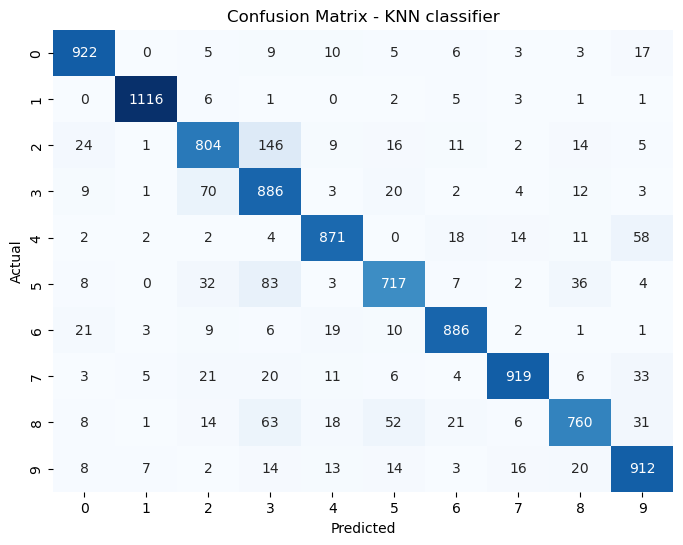

Classification Report - KNN classifier:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.98      0.98      0.98      1135
           2       0.83      0.78      0.81      1032
           3       0.72      0.88      0.79      1010
           4       0.91      0.89      0.90       982
           5       0.85      0.80      0.83       892
           6       0.92      0.92      0.92       958
           7       0.95      0.89      0.92      1028
           8       0.88      0.78      0.83       974
           9       0.86      0.90      0.88      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [243]:
from sklearn.metrics import accuracy_score,log_loss,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
knn.fit(x_train, y_train_re)

# Predict on test data
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_re, y_pred)
print("Accuracy:", accuracy)

draw(y_pred,'KNN classifier')

Naive Bayes Accuracy: 0.6186


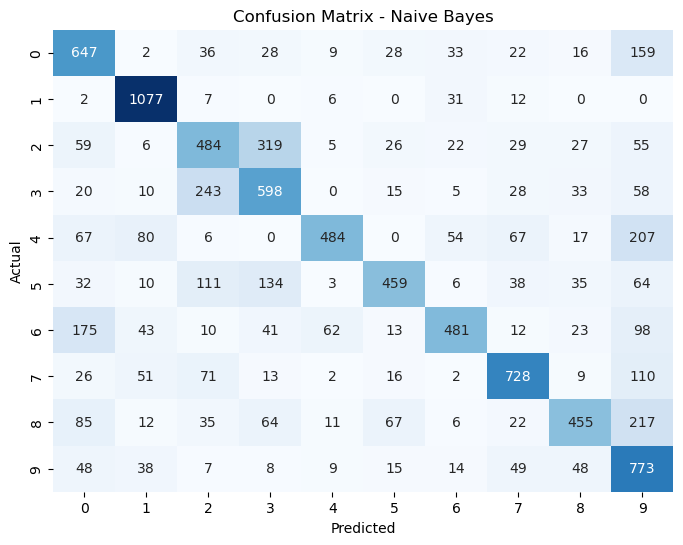

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.56      0.66      0.60       980
           1       0.81      0.95      0.87      1135
           2       0.48      0.47      0.47      1032
           3       0.50      0.59      0.54      1010
           4       0.82      0.49      0.62       982
           5       0.72      0.51      0.60       892
           6       0.74      0.50      0.60       958
           7       0.72      0.71      0.72      1028
           8       0.69      0.47      0.56       974
           9       0.44      0.77      0.56      1009

    accuracy                           0.62     10000
   macro avg       0.65      0.61      0.61     10000
weighted avg       0.65      0.62      0.62     10000



In [244]:
# Naive Bayes

# Initialize and train Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train_re)

# Predict on test data
y_pred_nb = nb.predict(x_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test_re, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# visualize the performance of Naive Bayes, create confusion matrices and classification 
draw(y_pred_nb,'Naive Bayes')

Logistic Regression Accuracy: 0.8436


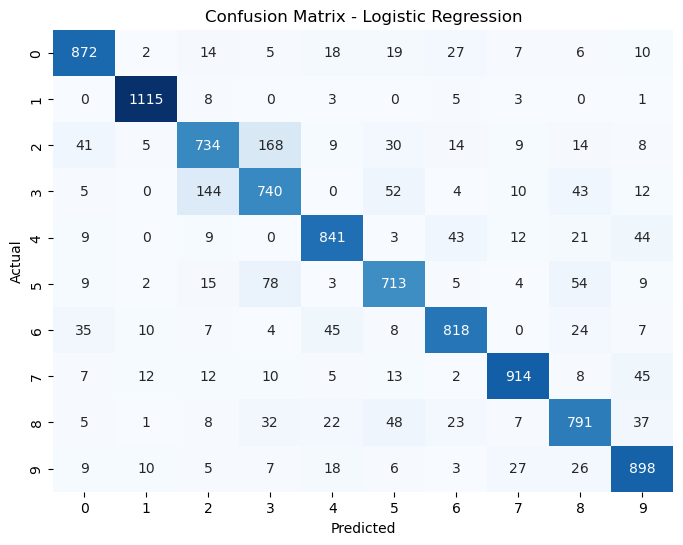

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       980
           1       0.96      0.98      0.97      1135
           2       0.77      0.71      0.74      1032
           3       0.71      0.73      0.72      1010
           4       0.87      0.86      0.86       982
           5       0.80      0.80      0.80       892
           6       0.87      0.85      0.86       958
           7       0.92      0.89      0.90      1028
           8       0.80      0.81      0.81       974
           9       0.84      0.89      0.86      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [245]:
# Logistic Regression

# Initialize and train Logistic Regression classifier
#lr = LogisticRegression(max_iter=10000)
#lr.fit(x_train, y_train_re)

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(x_train, y_train_re)

# Predict on test data
y_pred_lr = pipeline.predict(x_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_re, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# visualize the performance of Logistic Regression, create confusion matrices and classification 
draw(y_pred_lr,'Logistic Regression')

Random Forest Accuracy: 0.8662


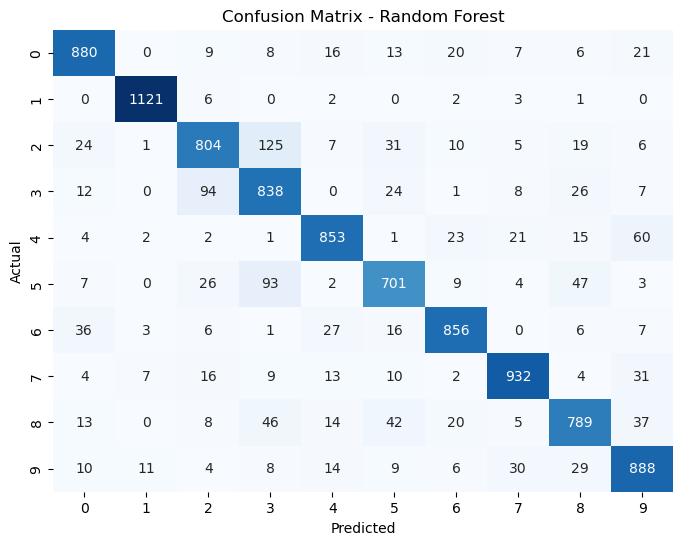

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       980
           1       0.98      0.99      0.98      1135
           2       0.82      0.78      0.80      1032
           3       0.74      0.83      0.78      1010
           4       0.90      0.87      0.88       982
           5       0.83      0.79      0.81       892
           6       0.90      0.89      0.90       958
           7       0.92      0.91      0.91      1028
           8       0.84      0.81      0.82       974
           9       0.84      0.88      0.86      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



In [246]:
# Random Forest

# Initialize and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train_re)

# Predict on test data
y_pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_re, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# visualize the performance of Random Forest, create confusion matrices and classification 
draw(y_pred_rf,'Random Forest')

Decision Tree Accuracy: 0.758


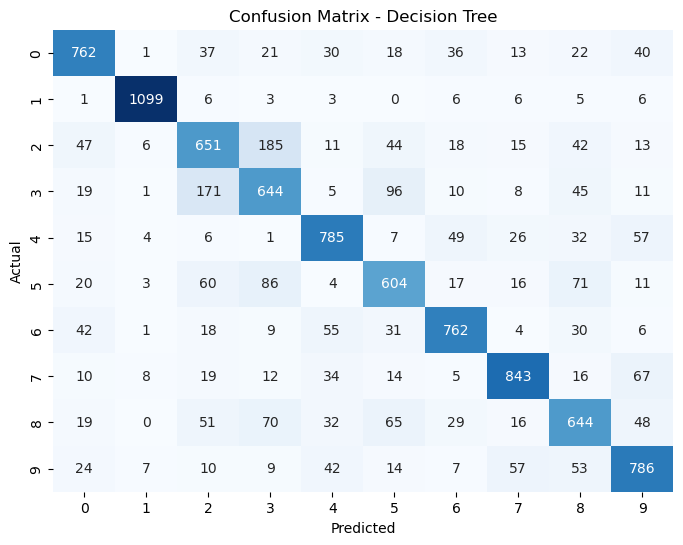

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       980
           1       0.97      0.97      0.97      1135
           2       0.63      0.63      0.63      1032
           3       0.62      0.64      0.63      1010
           4       0.78      0.80      0.79       982
           5       0.68      0.68      0.68       892
           6       0.81      0.80      0.80       958
           7       0.84      0.82      0.83      1028
           8       0.67      0.66      0.67       974
           9       0.75      0.78      0.77      1009

    accuracy                           0.76     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.76      0.76     10000



In [247]:
# Decision Tree

# Initialize and train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train_re)

# Predict on test data
y_pred_dt = dt.predict(x_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_re, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# visualize the performance of Decision Tree, create confusion matrices and classification 
draw(y_pred_dt,'Decision Tree')

Support Vector Classifier Accuracy: 0.6866


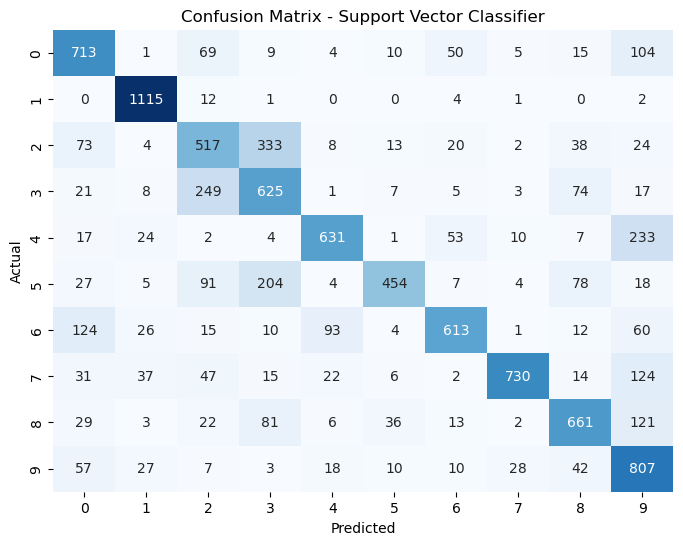

Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       980
           1       0.89      0.98      0.94      1135
           2       0.50      0.50      0.50      1032
           3       0.49      0.62      0.54      1010
           4       0.80      0.64      0.71       982
           5       0.84      0.51      0.63       892
           6       0.79      0.64      0.71       958
           7       0.93      0.71      0.80      1028
           8       0.70      0.68      0.69       974
           9       0.53      0.80      0.64      1009

    accuracy                           0.69     10000
   macro avg       0.71      0.68      0.69     10000
weighted avg       0.71      0.69      0.69     10000



In [248]:
# support vector classifier

# Initialize and train Support Vector Classifier (SVC)
svc = SVC(random_state=42)
svc = svc.fit(x_train, y_train_re)

# Predict on test data
y_pred_svc = svc.predict(x_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test_re, y_pred_svc)
print("Support Vector Classifier Accuracy:", accuracy_svc)

# Visualize the performance of SVC, create confusion matrices and classification
draw(y_pred_svc, 'Support Vector Classifier')

Linear Regression Accuracy: 0.2081


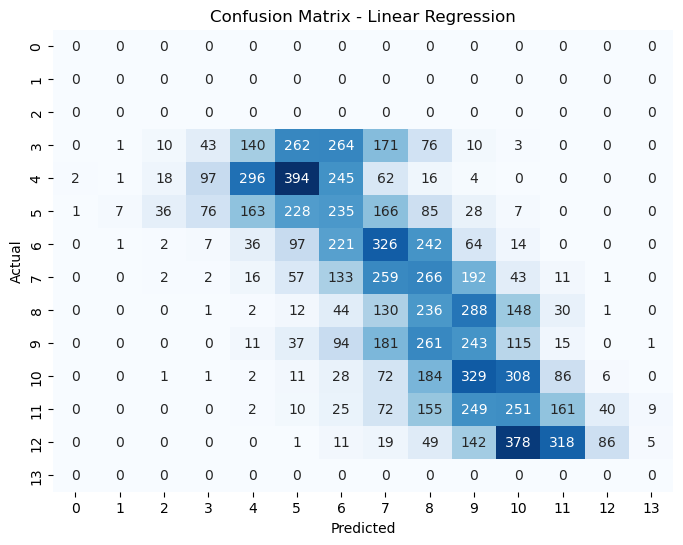

Classification Report - Linear Regression:
              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         0
          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.19      0.04      0.07       980
           1       0.44      0.26      0.33      1135
           2       0.21      0.22      0.21      1032
           3       0.17      0.22      0.19      1010
           4       0.18      0.26      0.21       982
           5       0.15      0.26      0.19       892
           6       0.16      0.25      0.19       958
           7       0.24      0.30      0.27      1028
           8       0.26      0.17      0.20       974
           9       0.64      0.09      0.15      1009
          10       0.00      0.00      0.00         0

    accuracy                           0.21     10000
   macro avg       0.19      0.15      0.14     10000
weighted avg       0.27      0.21    

C:\Users\Abo Hasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abo Hasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abo Hasan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [249]:
# Linear Regression

# Initialize and train Linear Regression model
lnr = LinearRegression()
lnr.fit(x_train, y_train_re)

# Predict on test data
y_pred_lnr = lnr.predict(x_test)

# Convert predicted values to discrete classes
y_pred_class_lnr = np.round(y_pred_lnr).astype(int)

# Calculate accuracy
accuracy_lnr = accuracy_score(y_test_re, y_pred_class_lnr)
print("Linear Regression Accuracy:", accuracy_lnr)

# visualize the performance of Linear Regression, create confusion matrices and classification 
draw(y_pred_class_lnr,'Linear Regression')

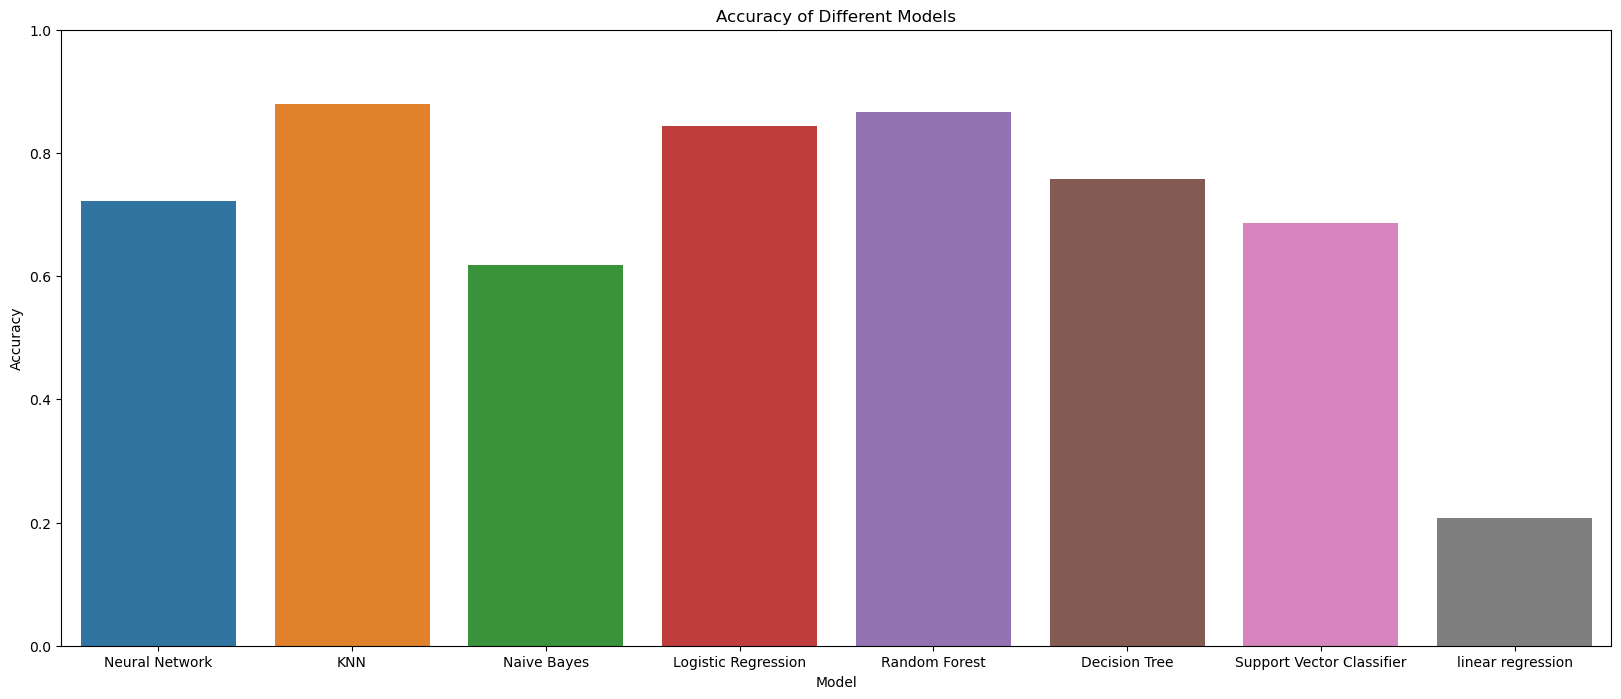

In [250]:
# Define model names and accuracies
models = ['Neural Network','KNN','Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree','Support Vector Classifier', 'linear regression']
accuracies = [test_accuracy, accuracy,accuracy_nb, accuracy_lr, accuracy_rf, accuracy_dt, accuracy_svc, accuracy_lnr]

# Plot
plt.figure(figsize=(20, 8))
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.show()


In [251]:
def predict(model, test_sample):
    test_sample_pre =  preprocess_images(test_sample)
    
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))  # Updated input_shape
    x = base_model.output
    x = Flatten()(x)
    feature_model = Model(inputs=base_model.input, outputs=x)
    X_test_features = feature_model.predict(test_sample_pre)
    

   
    predicted_class = model.predict(X_test_features)
    k = 0
    for i in predicted_class:
        print(f"test sample {k}, Predicted Class = {i}")
        k += 1
        

    
        

    return predicted_class



In [253]:
test_sample = x_test1
t = predict(rf, x_test1)
accuracy_pred = accuracy_score(y_test_re, t)

print(accuracy_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step
test sample 0, Predicted Class = 7
test sample 1, Predicted Class = 3
test sample 2, Predicted Class = 1
test sample 3, Predicted Class = 0
test sample 4, Predicted Class = 4
test sample 5, Predicted Class = 1
test sample 6, Predicted Class = 4
test sample 7, Predicted Class = 6
test sample 8, Predicted Class = 5
test sample 9, Predicted Class = 9
test sample 10, Predicted Class = 0
test sample 11, Predicted Class = 6
test sample 12, Predicted Class = 9
test sample 13, Predicted Class = 0
test sample 14, Predicted Class = 1
test sample 15, Predicted Class = 3
test sample 16, Predicted Class = 9
test sample 17, Predicted Class = 7
test sample 18, Predicted Class = 0
test sample 19, Predicted Class = 4
test sample 20, Predicted Class = 7
test sample 21, Predicted Class = 6
test sample 22, Predicted Class = 4
test sample 23, Predicted Class = 5
test sample 24, Predicted Class = 4
test sample 25, Predicted Class = 0
test sample 26, Predicted Class

In [254]:
print(accuracy_pred)

0.8662
